In [289]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [290]:
#Working on crop-data only.

class_names = ['NRG','RG']

baseDir = '/kaggle/input/eyepacs-airogs-light/release-crop/release-crop/'
testDir = baseDir + 'test'
trainDir = baseDir + 'train'
validDir = baseDir + 'validation'

train_NRG = os.path.join(trainDir, 'NRG')
train_RG = os.path.join(trainDir, 'RG')

valid_NRG = os.path.join(validDir, 'NRG')
valid_RG = os.path.join(validDir, 'RG')



In [291]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


In [292]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_118 (Conv2D)         (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_119 (Conv2D)         (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_101 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_120 (Conv2D)         (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_102 (MaxPooli  (None, 6, 6, 32)       

In [293]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [294]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_118 (Conv2D)         (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_119 (Conv2D)         (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_101 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_120 (Conv2D)         (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_102 (MaxPooli  (None, 6, 6, 32)       

In [295]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)
valid_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen  = ImageDataGenerator(rescale = 1.0/255)

# we use flow_from_directory to create a generator for training
train_generator = train_datagen.flow_from_directory(trainDir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(64, 64))

# we use flow_from_directory to create a generator for validation
validation_generator =  valid_datagen.flow_from_directory(validDir,
                                                         batch_size=20,
                                                         class_mode='binary',
                                                         target_size=(64, 64))

test_generator =  test_datagen.flow_from_directory(testDir,
                                                         batch_size=20,
                                                         class_mode='binary',
                                                         target_size=(64, 64))

Found 5000 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [296]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_generator, 
            epochs=25,
            validation_data=validation_generator, 
            verbose=2 )

Epoch 1/25
250/250 - 18s - loss: 0.6843 - accuracy: 0.5586 - val_loss: 0.7034 - val_accuracy: 0.5093 - 18s/epoch - 70ms/step
Epoch 2/25
250/250 - 17s - loss: 0.6461 - accuracy: 0.6314 - val_loss: 0.6840 - val_accuracy: 0.5907 - 17s/epoch - 66ms/step
Epoch 3/25
250/250 - 16s - loss: 0.5696 - accuracy: 0.6980 - val_loss: 0.5713 - val_accuracy: 0.7259 - 16s/epoch - 65ms/step
Epoch 4/25
250/250 - 16s - loss: 0.5230 - accuracy: 0.7340 - val_loss: 0.5172 - val_accuracy: 0.7444 - 16s/epoch - 65ms/step
Epoch 5/25
250/250 - 17s - loss: 0.4833 - accuracy: 0.7672 - val_loss: 0.5262 - val_accuracy: 0.7593 - 17s/epoch - 67ms/step
Epoch 6/25
250/250 - 16s - loss: 0.4696 - accuracy: 0.7792 - val_loss: 0.4854 - val_accuracy: 0.7722 - 16s/epoch - 66ms/step
Epoch 7/25
250/250 - 17s - loss: 0.4461 - accuracy: 0.7950 - val_loss: 0.4858 - val_accuracy: 0.7778 - 17s/epoch - 67ms/step
Epoch 8/25
250/250 - 16s - loss: 0.4250 - accuracy: 0.8028 - val_loss: 0.4682 - val_accuracy: 0.7796 - 16s/epoch - 64ms/step


50/50 - 2s - loss: 0.5525 - accuracy: 0.8190 - 2s/epoch - 38ms/step


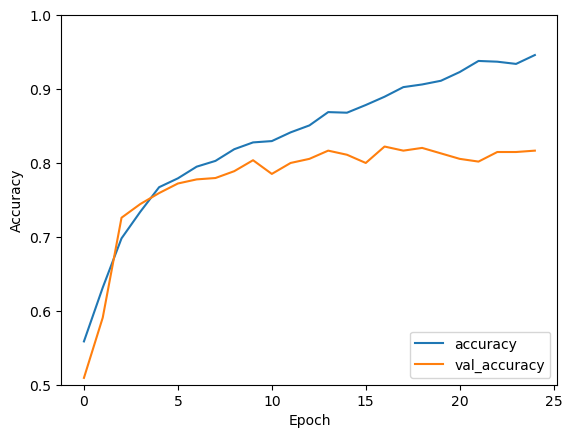

In [297]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)

In [298]:
print( test_acc)

0.8190000057220459
